# Explore here

In [8]:
# Librerias necesarias para modelo
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import os
current_dir = os.getcwd()

In [10]:
import os
import pandas as pd
import numpy as np

# Accedemos a cada train y a cada test tanto de X como de Y, y los dejamos metidos en variables para el siguiente paso!! 
# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
 
BASE_PATH = os.path.join(current_dir,'../data/csv_model')
TRAIN_PATHS = [
    "X_train_con_outliers.csv",
    "X_train_sin_outliers.csv"
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_csv(f"{BASE_PATH}/{path}") 
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Los separamos en base path y el resto de la ruta de acceso para tener el código mas legible. 
TEST_PATHS = [
    "X_test_con_outliers.csv",
    "X_test_sin_outliers.csv"
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_csv(f"{BASE_PATH}/{path}")
    )

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos despues. 
y_train = pd.read_csv(f"{BASE_PATH}/y_train.csv")
y_test = pd.read_csv(f"{BASE_PATH}/y_test.csv")

### Random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

# Le pasamos los train y los test al modelo , lo entrenamos y metemos los resultados del test en una lista para poder comparar y escoger el mejor. 

results = []

for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = RandomForestClassifier(random_state = 77)
    
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train": r2_score(y_train, y_pred_train),
            "test": r2_score(y_test, y_pred_test)
        }
    )

results

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[{'train': 1.0, 'test': 0.9899316225875143},
 {'train': 0.9998160308873063, 'test': 0.9689385628816899}]

In [19]:
# Optimización del modelo. 

best_dataset = 1 # Porque de results, el mayor acuracy en train y test.

# Ponemos los hyperparametros según la documentación.  

hyperparams = {
    'n_estimators': [50],  # Número de árboles
}

from sklearn.model_selection import GridSearchCV 

model = RandomForestClassifier(random_state = 77) # Volvemos a seleccionar el modelo sin entrenar. 
grid = GridSearchCV(model, hyperparams, scoring = "accuracy") # Metemos en el grid los nuevos hyperparametros

In [20]:
# Entrenamos el modelo con los nuevos parametros. 

grid.fit(TRAIN_DATASETS[best_dataset], y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

GridSearchCV(estimator=RandomForestClassifier(random_state=77),
             param_grid={'n_estimators': [50]}, scoring='accuracy')

In [23]:
grid.best_estimator_

RandomForestClassifier(n_estimators=50, random_state=77)

In [24]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.  

final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

In [25]:
score_train = r2_score(y_train, y_pred_train),
score_test = r2_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.9998143290145062,)
Score test: 0.9679384820997504


In [18]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.13976843212008422,)
Score test: 0.13929260870987795


IndexError: list index out of range

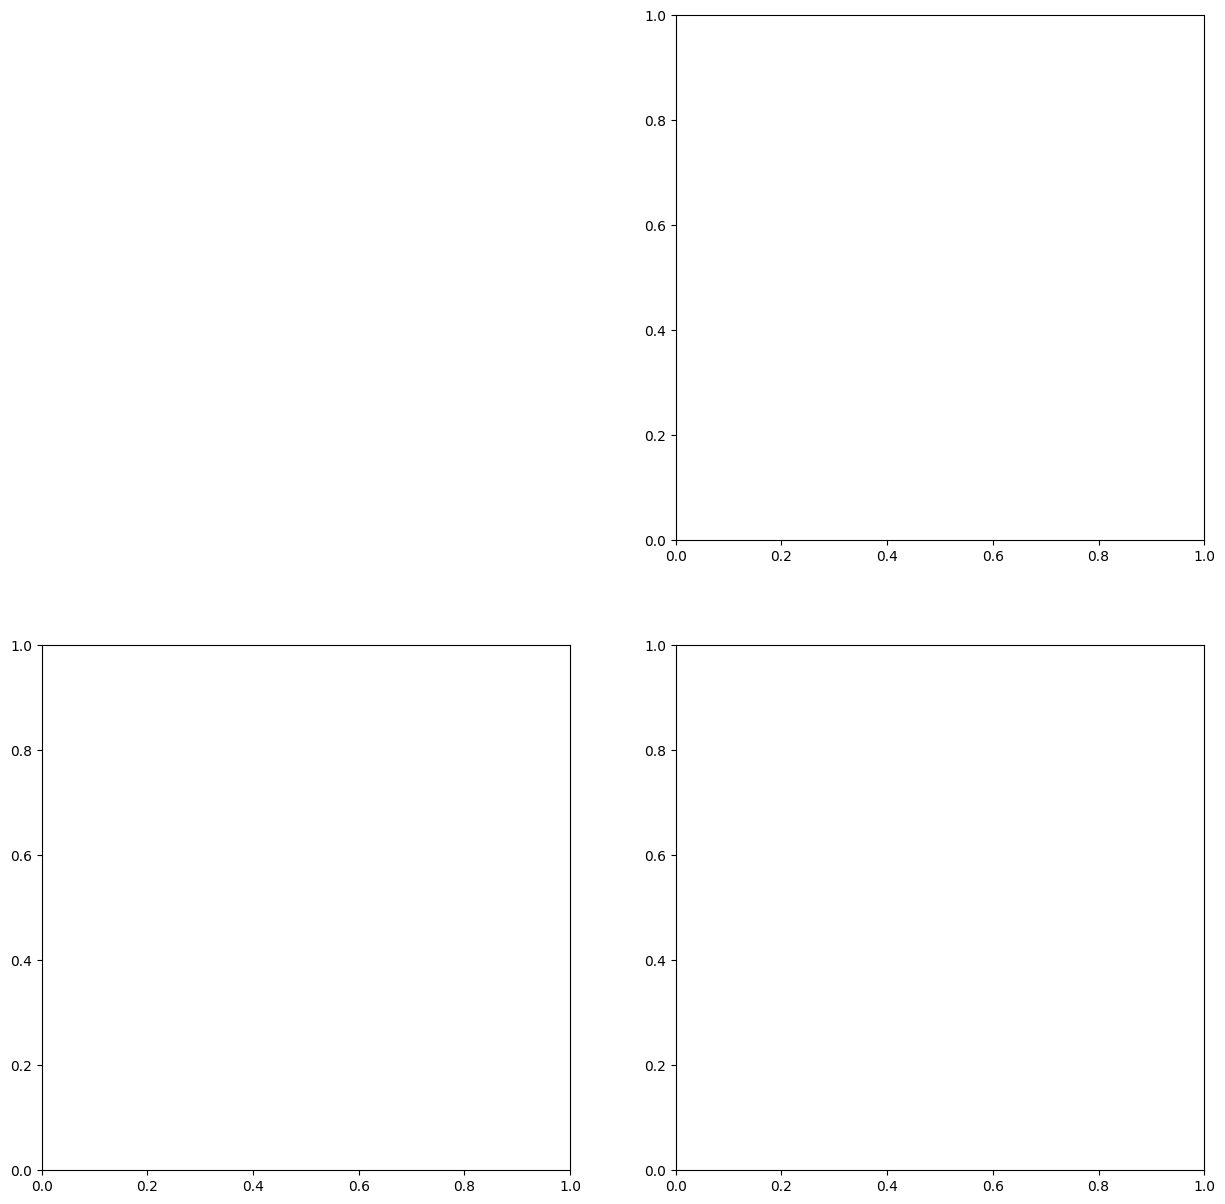

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

final_model = grid.best_estimator_
column_names = TRAIN_DATASETS[best_dataset].columns.tolist()

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(final_model.estimators_[0], ax = axis[0, 0], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[1], ax = axis[0, 1], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[2], ax = axis[1, 0], feature_names = column_names, class_names = ["0", "1"], filled = True)
tree.plot_tree(final_model.estimators_[3], ax = axis[1, 1], feature_names = column_names, class_names = ["0", "1"], filled = True)

plt.show()

In [11]:
import pickle

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/src/models/Random_forest_model.sav", "wb") as file:
    pickle.dump(final_model, file)

### Análisis final

Tras revisar el data set intentando corregir el overfiting de la manera mas óptima, he cosneguido darme cuneta que habia un desbalance de clases en el conjunto de datos, lo que he conseguido evitar con el parametro (class_weight = 'balanced'), con esto y junto a los hyperparametros escogidos, he conseguido bajar la iferencia entre train y test a menos de un 0.08 y logrando tambien mejores resultados de recall.